In [101]:
# Import Libraries
import pandas as pd
# We will commonly use pandas to handle dataframes, which is a crucial library for handling datasets in ML tasks.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from pickle import dump

In [102]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Removing variables that are not useful

In [103]:
df_clean = df[["MedInc", "Latitude", "Longitude"]]
df_clean.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Divide the dataset

In [104]:
X_train, X_test = train_test_split(df_clean, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [105]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


K-Means model

In [106]:
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [107]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


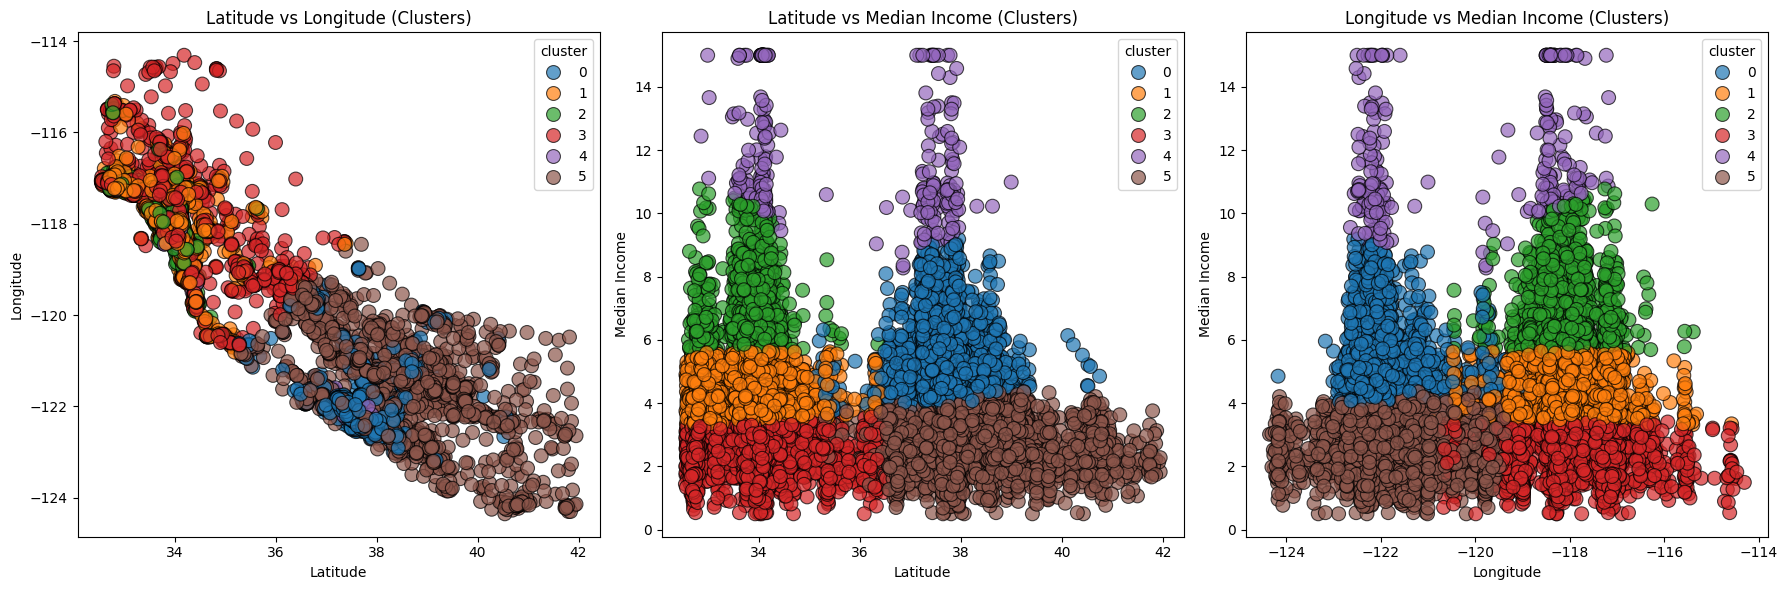

In [108]:
# Create a 1x3 grid of subplots
fig, axis = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Latitude vs Longitude with clusters
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", 
                palette="tab10", alpha=0.7, edgecolor="k", s=100)
axis[0].set_title("Latitude vs Longitude (Clusters)")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Longitude")

# Plot 2: Latitude vs Median Income with clusters
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", 
                palette="tab10", alpha=0.7, edgecolor="k", s=100)
axis[1].set_title("Latitude vs Median Income (Clusters)")
axis[1].set_xlabel("Latitude")
axis[1].set_ylabel("Median Income")

# Plot 3: Longitude vs Median Income with clusters
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", 
                palette="tab10", alpha=0.7, edgecolor="k", s=100)
axis[2].set_title("Longitude vs Median Income (Clusters)")
axis[2].set_xlabel("Longitude")
axis[2].set_ylabel("Median Income")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [109]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

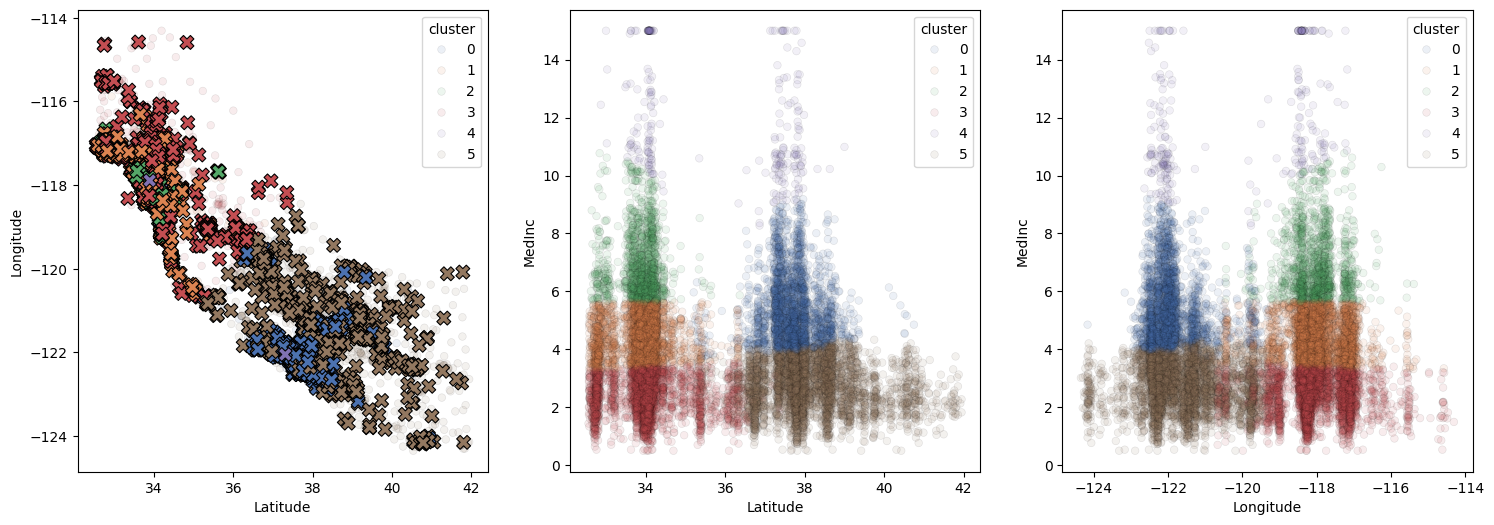

In [110]:
# Create a 1x3 grid for subplots
fig, axis = plt.subplots(1, 3, figsize=(18, 6))

# Plot for training data
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", 
                palette="deep", alpha=0.1, s=30, edgecolor="k")
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", 
                palette="deep", alpha=0.1, s=30, edgecolor="k")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", 
                palette="deep", alpha=0.1, s=30, edgecolor="k")

# Plot for testing data
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", 
                palette="deep", marker="X", s=100, edgecolor="k", label="Test Data")
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", 
                palette="deep", marker="X", s=100, edgecolor="k", label="Test Data")
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", 
                palette="deep", marker="X", s=100, edgecolor="k", label="Test Data")

# Titles and labels
axis[0].set_title("Latitude vs Longitude (Train & Test)")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Longitude")

axis[1].set_title("Latitude vs Median Income (Train & Test)")
axis[1].set_xlabel("Latitude")
axis[1].set_ylabel("Median Income")

axis[2].set_title("Longitude vs Median Income (Train & Test)")
axis[2].set_xlabel("Longitude")
axis[2].set_ylabel("Median Income")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the legend for the test data only
for ax in axis:
    ax.legend(loc="upper right")

# Show plot
plt.show()

Supervised model

KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=9)


In [66]:
# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print(y_pred)

[3 3 5 ... 4 5 1]


In [67]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 561    0    0    0    0    0]
 [   0  983    0    0    0    0]
 [   0    0  299    0    0    0]
 [   0    0    0 1111    0    0]
 [   0    0    0    0   62    0]
 [   0    0    0    0    0 1112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy Score: 1.0


Random Forest

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

In [80]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [81]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 561    0    0    0    0    0]
 [   0  983    0    0    0    0]
 [   0    0  299    0    0    0]
 [   0    0    0 1111    0    0]
 [   0    0    0    0   62    0]
 [   0    0    0    0    0 1112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128

Accuracy Score: 1.0


Save the Models

In [113]:
os.makedirs("models", exist_ok=True)

joblib.dump(model_unsup, open("models/k-means_default_42.sav", "wb"))
joblib.dump(knn, open("models/knn_n_9.sav", "wb"))
joblib.dump(rf_model, open("models/random_forest.sav", "wb"))